In [1]:
#Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [2]:
# List of ASEAN countries
asean_countries = [
    'Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 
    'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'
]

# Oceanic countries in the AANZFTA
oceanic_countries = [
    'Australia', 'New Zealand'
]

# Combined list for AANZFTA
aanzfta_countries = asean_countries + oceanic_countries

In [3]:
df_aanzfta = df[df['job_country'].isin(aanzfta_countries)].copy()

In [6]:
df_aanzfta['job_posted_month'] = df_aanzfta['job_posted_date'].dt.strftime('%B')

df_aanzfta

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
25,Senior Data Analyst,"Senior Officer, Data Analyst, GTO",Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-06-23 13:56:10,True,False,Singapore,None,NaN,NaN,United Overseas Bank,['sql'],{'programming': ['sql']},June
44,Data Scientist,Binance Accelerator Program - Data Scientist (...,Singapore,via LinkedIn,Contractor,False,Singapore,2023-04-12 13:53:26,False,False,Singapore,None,NaN,NaN,Binance,"['python', 'java', 'scala']","{'programming': ['python', 'java', 'scala']}",April
47,Senior Data Engineer,Senior Data Engineering,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via Trabajo.org,Full-time,False,Malaysia,2023-05-06 14:15:59,True,False,Malaysia,None,NaN,NaN,Agensi Pekerjaan BTC Sdn Bhd,"['sql', 'python', 'scala', 'nosql', 'java', 'c...","{'analyst_tools': ['power bi', 'microstrategy'...",May
76,Data Analyst,Data Analyst - 14785091749,Anywhere,via Jobgether,Full-time,True,Philippines,2023-08-26 13:13:26,False,False,Philippines,None,NaN,NaN,Support Shepherd,"['sql', 'python', 'r', 'excel', 'tableau', 'po...","{'analyst_tools': ['excel', 'tableau', 'power ...",August
82,Data Engineer,Cbi Application Data Design Engineer,Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-12-24 13:17:39,False,False,Singapore,None,NaN,NaN,Siemens,None,None,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785713,Cloud Engineer,"Data Center Chief Engineer, AWS Infrastructure...","Bangkok, Thailand",melalui LinkedIn,Pekerjaan tetap,False,Thailand,2023-03-12 06:37:47,False,False,Thailand,None,NaN,NaN,Amazon Web Services (AWS),None,None,March
785730,Data Engineer,"Data Center Engineering Operations Engineer , ...","Bangkok, Thailand",melalui LinkedIn,Pekerjaan tetap,False,Thailand,2023-03-12 06:37:47,False,False,Thailand,None,NaN,NaN,Amazon Web Services (AWS),"['excel', 'word', 'outlook']","{'analyst_tools': ['excel', 'word', 'outlook']}",March
785733,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:17,False,False,Singapore,None,NaN,NaN,Hydra X Pte. Ltd.,"['docker', 'kubernetes']","{'other': ['docker', 'kubernetes']}",March
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",March


In [8]:
df_aanzfta_pivot = df_aanzfta.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

In [10]:
df_aanzfta_pivot.reset_index(inplace=True)
df_aanzfta_pivot['month_num'] = pd.to_datetime(df_aanzfta_pivot['job_posted_month'], format='%B').dt.month

df_aanzfta_pivot.sort_values('month_num', inplace=True)
df_aanzfta_pivot.set_index('job_posted_month', inplace=True)
df_aanzfta_pivot.drop(columns='month_num', inplace=True)

In [11]:
df_aanzfta_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,708,136,2168,2226,1155,145,376,523,264,548
February,476,91,1185,1243,609,120,217,262,156,333
March,537,146,1383,1338,682,160,241,310,128,539
April,713,216,1281,1275,697,149,241,318,154,653
May,399,97,1226,1110,626,100,203,239,141,292
June,484,94,1449,1326,734,128,209,312,162,266
July,550,137,1605,1370,720,150,256,322,152,451
August,654,195,1638,1648,862,174,275,364,189,598
September,543,108,1273,1220,625,139,182,280,111,375


<Axes: xlabel='job_posted_month'>

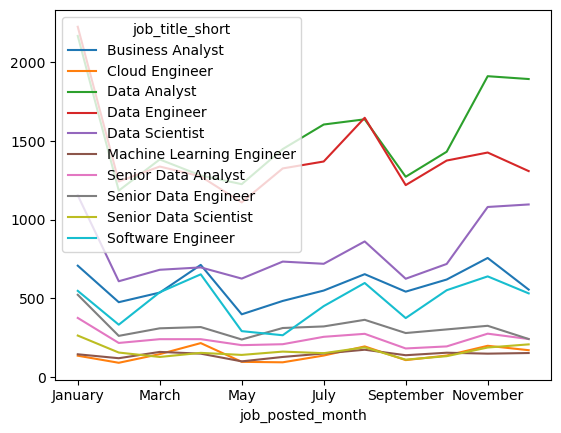

In [12]:
df_aanzfta_pivot.plot(kind='line')

In [15]:
top_3 = df_aanzfta['job_title_short'].value_counts().head(3)
top_3 = top_3.index.to_list()

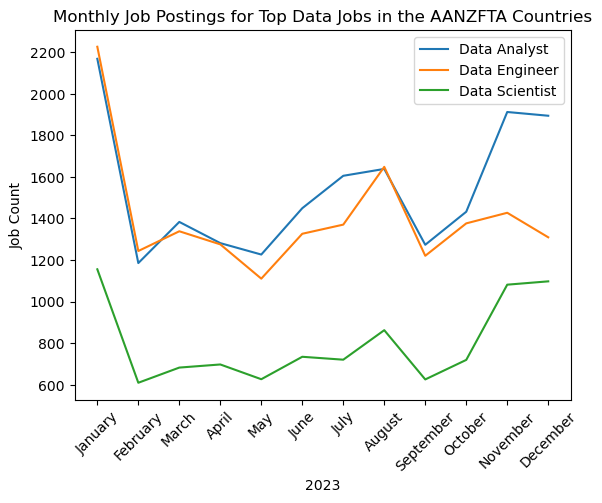

In [17]:
df_aanzfta_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in the AANZFTA Countries')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.xticks(ticks=range(len(df_aanzfta_pivot.index)), labels=df_aanzfta_pivot.index, rotation=45)
plt.show()